#### Importing Functions

In [1]:
from utils import * 

In [2]:
import cv2
import os
import tifffile # for reading tiff files. There are other modules that can do this, but tifffile is most stable on Windows
import numpy as np # for array handling
import matplotlib.pyplot as plt # for QC
import glob # to gather up image filepath lists
import rasterio
from rasterio.plot import show
import scipy # same
import imagecodecs

## Available data


There are the folders:
- scenes
- masks
- val --> masks


The scenes folder includes Sentinel-2 imagery with 3 bands (also called channels in DL-jargon (B3-B4-B8). The mask contains vaule 0 for ocean and value 1 for ice sheet.

In [3]:
training_file_path = 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes/*.tif'
testing_file_path = 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val/*.tif'

In [4]:
top_train_list = read_data(training_file_path)

['D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T21DVJ_A026576_20220408T131906.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T21EWK_A026776_20220422T125859.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T21EXK_A026776_20220422T125859.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T23VMH_A024904_20211212T143513.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T23VMH_A025147_20211229T142513.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T23VNG_A025147_20211229T142513.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\L1C_T23VNH_A025147_20211229T142513.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/scenes\\S2B_MSIL1C_20220128T131859_N0400_R095_T20DNP_20220128T150039-1.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023

In [5]:
#Available validation scenes
top_test_list = read_data(testing_file_path)

['D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val\\S2B_MSIL1C_20220128T131859_N0400_R095_T20DNP_20220128T150039-11.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val\\S2B_MSIL1C_20220302T132919_N0400_R138_T20DMN_20220302T163212-11.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val\\S2B_MSIL2A_20211129T131909_N0301_R095_T19DEE_20211129T151203-2.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val\\S2B_MSIL2A_20211129T131909_N0301_R095_T19DEE_20211129T151203-3.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val\\S2B_MSIL2A_20211129T131909_N0301_R095_T19DEE_20211129T151203-4.tif'
 'D:/EAGLE_Deep_Learning/Deep-Learning-Final-Project-SS-2023/Data/val\\S2B_MSIL2A_20211129T131909_N0301_R095_T19DEE_20211129T151203-5.tif']


#### Plotting the first band of a training image for testing

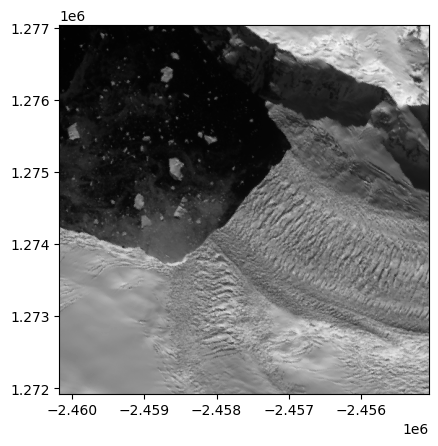

In [6]:
src = rasterio.open("D:\EAGLE_Deep_Learning\Deep-Learning-Final-Project-SS-2023\Data\scenes\S2B_MSIL1C_20220128T131859_N0400_R095_T20DNP_20220128T150039-1.tif")
img0 = show(src.read(1),transform=src.transform, cmap='gray')

TASK 1: Print the pixel values of random training scenes. Which range have the pixel values and what do they represent?

----- Make our data DL ready -----

In [7]:
#creating empty arrays to store our data
imgResize = 512
channels = 3
train_dir, test_dir = create_arrays(512, 3)

In [24]:

# def resize_images(resize_value, no_of_channels, data_list, output_file_path):

#     for i in range(len(data_list)):
#         img0 = tifffile.imread(data_list[i])  # Read the image
#         img_reshaped = cv2.resize(img0, (resize_value, no_of_channels))  # Resize it

#         # Local normalization & standardization of the image values
#         img_norm = np.clip((img_reshaped - img_reshaped.mean()) / (0.5 * img_reshaped.std()), 0, 1)

#         # Save the individual reshaped image as TIFF
#         save_path = os.path.join(output_file_path, f'image_{i}.tif')
#         tifffile.imwrite(save_path, img_norm)


In [8]:
resized_training_images = resize_images(imgResize, channels, top_train_list, train_dir)

In [9]:
resized_testing_images = resize_images(imgResize, channels, top_test_list, test_dir)

TASK 2: Why do we need to scale our image data and what different methods exist? A great resource is: https://machinelearningmastery.com/how-to-manually-scale-image-pixel-data-for-deep-learning/


----- Processing the labels ------

In [16]:
train_mask_path = "D:\EAGLE_Deep_Learning\Deep-Learning-Final-Project-SS-2023\Data\masks\*.tif"

label_train_list = read_data(train_mask_path)

['D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T21DVJ_A026576_20220408T131906_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T21EWK_A026776_20220422T125859_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T21EXK_A026776_20220422T125859_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T23VMH_A024904_20211212T143513_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T23VMH_A025147_20211229T142513_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T23VNG_A025147_20211229T142513_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\L1C_T23VNH_A025147_20211229T142513_mask.tif'
 'D:\\EAGLE_Deep_Learning\\Deep-Learning-Final-Project-SS-2023\\Data\\masks\\S2B_MSIL1C_20220128T131859_N0400_R095_T20DNP_20220128T150039-1.tif'
 

In [22]:
# BUG FIX
testing_mask_path = "D:\EAGLE_Deep_Learning\Deep-Learning-Final-Project-SS-2023\Data\val\masks\*.tif"

label_test_list = read_data(testing_mask_path)

[]


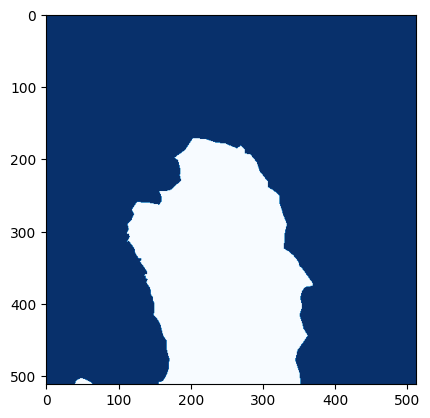

In [21]:
#Lets have a look at our labels
img = tifffile.imread(label_train_list[8])
plt.imshow(img, cmap='Blues')



Let's start reshaping our labels.

In [18]:
# Define the directory where you want to save the individual label images
label_save_dir_train = './train_label_images/'
label_save_dir_test = './test_label_images/'

# Create directories if they don't exist
os.makedirs(label_save_dir_train, exist_ok=True)
os.makedirs(label_save_dir_test, exist_ok=True)

In [19]:
import tifffile
label_train_total = np.zeros((len(label_train_list), imgResize, imgResize, 1))
for i in range(len(label_train_list)):
    img = tifffile.imread(label_train_list[i])
    #again in our case resizing is not necessary but reshaping
    img_reshaped = cv2.resize(img, (imgResize, imgResize, 1))
    label_train_total[i] = img_reshaped

In [ ]:
label_test_total = np.zeros((len(label_test_list), imgResize, imgResize, 1))
for i in range(len(label_test_list)):
    img = tifffile.imread(label_test_list[i])
    img_reshaped = cv2.resize(img, (imgResize, imgResize, 1))
    label_test_total[i] = img_reshaped

TASK 3: What are the label values and dimensions before and after reshaping? And why do we need to one-hot-encode our images?

In [20]:
onehot_label_train_total = np.zeros((len(label_train_list),imgResize,imgResize,2), dtype=float)
for k in range(len(label_train_list)):
    for i in range(imgResize):
        for j in range(imgResize):
            # ocean
            if label_train_total[k,i,j,0]==0.:
                onehot_label_train_total[k,i,j,0]=1
            # ice sheet
            elif label_train_total[k,i,j,0]>0:
                onehot_label_train_total[k,i,j,1]=1

In [21]:
onehot_label_test_total = np.zeros((len(label_test_list),imgResize,imgResize,2), dtype=float)
for k in range(len(label_test_list)):
    for i in range(imgResize):
        for j in range(imgResize):
            # ocean
            if label_test_total[k,i,j,0]==0.:
                onehot_label_test_total[k,i,j,0]=1
            # ice sheet
            elif label_test_total[k,i,j,0]> 0:
                onehot_label_test_total[k,i,j,1]=1

TASK 4: Check your one-hot-encoded labels regarding dimensions and unique values.

Let's check how our one-hot-encoded labels look like

IndexError: index 2 is out of bounds for axis 0 with size 0

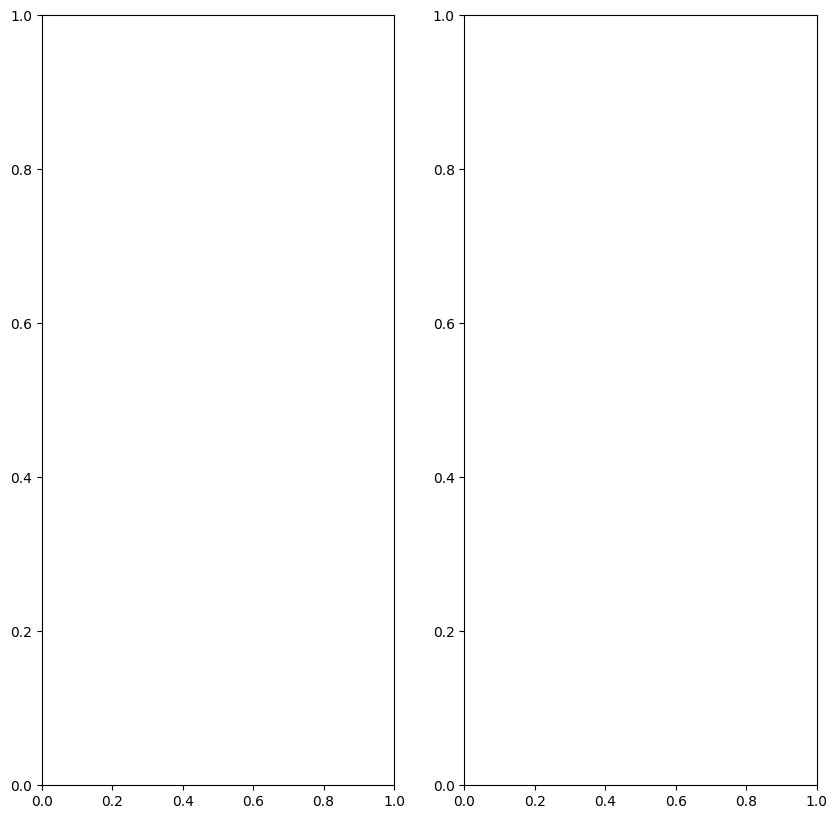

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10,10))
axes[0].imshow(onehot_label_test_total[2,:,:,0], cmap='gray')
axes[1].imshow(onehot_label_test_total[2,:,:,1], cmap='gray')
print(np.unique(onehot_label_train_total))

Great, this is looking good. Finnaly, we save our labels for part 2

In [23]:
np.save('./label_train.npy', onehot_label_train_total)
np.save('./label_test.npy', onehot_label_test_total)